# Wczytanie bibliotek

In [ ]:
!pip install emlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for emlearn: filename=emlearn-0.16.5-cp310-cp310-linux_x86_64.whl size=4569484 sha256=762e3cbc7fa629e3d3a5721ff064f7d46a2119b5dc971e9f0091245d57f71401
  Stored in directory: /root/.cache/pip/wheels/9a/e7/f4/cb27afc4a7164bbe7193d1e8843ef0f3cb90d01bad0f6a19f9
Successfully built emlearn


In [ ]:
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
import emlearn

# Pobranie danych

In [ ]:
!wget https://github.com/c2dc/AB-TRAP/raw/main/1_Attack%20dataset/Local%20Area%20Network/data/attack_dataset.csv
!wget https://github.com/c2dc/AB-TRAP/raw/main/2_Bonafide%20dataset/data/bonafide_dataset_20201129.csv.gz
!gzip -d bonafide_dataset_20201129.csv.gz

--2023-05-24 17:35:28--  https://github.com/c2dc/AB-TRAP/raw/main/1_Attack%20dataset/Local%20Area%20Network/data/attack_dataset.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/c2dc/AB-TRAP/main/1_Attack%20dataset/Local%20Area%20Network/data/attack_dataset.csv [following]
--2023-05-24 17:35:29--  https://raw.githubusercontent.com/c2dc/AB-TRAP/main/1_Attack%20dataset/Local%20Area%20Network/data/attack_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20164255 (19M) [text/plain]
Saving to: ‘attack_dataset.csv’

attack_dataset.csv  100%[===================>]  19.23M  --.-KB/s    in

In [ ]:
df_attack = pd.read_csv('attack_dataset.csv')
df_bonafide = pd.read_csv('bonafide_dataset_20201129.csv')

In [ ]:
df_attack.columns

Index(['frame_info.encap_type', 'frame_info.time', 'frame_info.time_epoch',
       'frame_info.number', 'frame_info.len', 'frame_info.cap_len', 'eth.type',
       'ip.version', 'ip.hdr_len', 'ip.tos', 'ip.id', 'ip.flags',
       'ip.flags.rb', 'ip.flags.df', 'ip.flags.mf', 'ip.frag_offset', 'ip.ttl',
       'ip.proto', 'ip.checksum', 'ip.src', 'ip.dst', 'ip.len', 'ip.dsfield',
       'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.len',
       'tcp.hdr_len', 'tcp.flags', 'tcp.flags.fin', 'tcp.flags.syn',
       'tcp.flags.reset', 'tcp.flags.push', 'tcp.flags.ack', 'tcp.flags.urg',
       'tcp.flags.cwr', 'tcp.window_size', 'tcp.checksum',
       'tcp.urgent_pointer', 'tcp.options.mss_val'],
      dtype='object')

In [ ]:
df_bonafide.columns

Index(['frame_info.encap_type', 'frame_info.time', 'frame_info.time_epoch',
       'frame_info.number', 'frame_info.len', 'frame_info.cap_len', 'eth.type',
       'ip.version', 'ip.hdr_len', 'ip.tos', 'ip.id', 'ip.flags',
       'ip.flags.rb', 'ip.flags.df', 'ip.flags.mf', 'ip.frag_offset', 'ip.ttl',
       'ip.proto', 'ip.checksum', 'ip.src', 'ip.dst', 'ip.len', 'ip.dsfield',
       'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.len',
       'tcp.hdr_len', 'tcp.flags', 'tcp.flags.fin', 'tcp.flags.syn',
       'tcp.flags.reset', 'tcp.flags.push', 'tcp.flags.ack', 'tcp.flags.urg',
       'tcp.flags.cwr', 'tcp.window_size', 'tcp.checksum',
       'tcp.urgent_pointer', 'tcp.options.mss_val'],
      dtype='object')

In [ ]:
df_attack.columns == df_bonafide.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
df_attack.shape

(86480, 41)

In [ ]:
df_bonafide.shape

(135558, 41)

In [ ]:
df_attack['attack'] = 1
df_bonafide['attack'] = 0

In [ ]:
df = pd.concat([df_attack, df_bonafide], ignore_index=True)

Tylko TCP

In [ ]:
wrong_proto = df[df['ip.proto'] != 6]['attack'].value_counts().values
df = df[df['ip.proto'] == 6]
print("It was found and removed", wrong_proto, "packets.")

It was found and removed [16397] packets.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205641 entries, 0 to 222037
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame_info.encap_type  205641 non-null  int64  
 1   frame_info.time        205641 non-null  object 
 2   frame_info.time_epoch  205641 non-null  float64
 3   frame_info.number      205641 non-null  int64  
 4   frame_info.len         205641 non-null  int64  
 5   frame_info.cap_len     205641 non-null  int64  
 6   eth.type               205641 non-null  object 
 7   ip.version             205641 non-null  float64
 8   ip.hdr_len             205641 non-null  float64
 9   ip.tos                 0 non-null       float64
 10  ip.id                  205641 non-null  object 
 11  ip.flags               205641 non-null  object 
 12  ip.flags.rb            205641 non-null  float64
 13  ip.flags.df            205641 non-null  float64
 14  ip.flags.mf            205641 non-nu

In [ ]:
(df.var() == 0)

<ipython-input-13-488b68681586>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.var() == 0)


frame_info.encap_type     True
frame_info.time_epoch    False
frame_info.number        False
frame_info.len           False
frame_info.cap_len       False
ip.version                True
ip.hdr_len                True
ip.tos                   False
ip.flags.rb               True
ip.flags.df              False
ip.flags.mf              False
ip.frag_offset           False
ip.ttl                   False
ip.proto                  True
ip.len                   False
tcp.srcport              False
tcp.dstport              False
tcp.seq                  False
tcp.ack                  False
tcp.len                  False
tcp.hdr_len              False
tcp.flags.fin            False
tcp.flags.syn            False
tcp.flags.reset          False
tcp.flags.push           False
tcp.flags.ack            False
tcp.flags.urg            False
tcp.flags.cwr            False
tcp.window_size          False
tcp.urgent_pointer       False
tcp.options.mss_val      False
attack                   False
dtype: b

In [ ]:
df.isna().sum().sort_values(ascending=False)

ip.tos                   205641
tcp.options.mss_val      156234
tcp.len                       2
frame_info.encap_type         0
tcp.flags.syn                 0
tcp.dstport                   0
tcp.seq                       0
tcp.ack                       0
tcp.hdr_len                   0
tcp.flags                     0
tcp.flags.fin                 0
tcp.flags.push                0
tcp.flags.reset               0
ip.dsfield                    0
tcp.flags.ack                 0
tcp.flags.urg                 0
tcp.flags.cwr                 0
tcp.window_size               0
tcp.checksum                  0
tcp.urgent_pointer            0
tcp.srcport                   0
ip.len                        0
frame_info.time               0
ip.dst                        0
frame_info.time_epoch         0
frame_info.number             0
frame_info.len                0
frame_info.cap_len            0
eth.type                      0
ip.version                    0
ip.hdr_len                    0
ip.id   

In [ ]:
features_to_remove = ['ip.hdr_len', 'ip.tos', 'ip.flags.rb', 'ip.flags.mf', 'ip.frag_offset']+\
 ['frame_info.time', 'frame_info.encap_type', 'frame_info.time_epoch', 'frame_info.number', 'frame_info.len', 'frame_info.cap_len', 'eth.type']+\
 ['ip.flags', 'ip.src', 'ip.dst','ip.version', 'ip.proto', 'tcp.flags']+\
 ["ip.checksum", "ip.ttl", "tcp.checksum", "tcp.seq", "tcp.ack", "tcp.options.mss_val"]
 # zerowa wariacja + warstwa łącza danych + redundant or invariable + różne powody

In [ ]:
df.drop(columns=features_to_remove, axis=1, inplace=True)
df.columns

Index(['ip.id', 'ip.flags.df', 'ip.len', 'ip.dsfield', 'tcp.srcport',
       'tcp.dstport', 'tcp.len', 'tcp.hdr_len', 'tcp.flags.fin',
       'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push', 'tcp.flags.ack',
       'tcp.flags.urg', 'tcp.flags.cwr', 'tcp.window_size',
       'tcp.urgent_pointer', 'attack'],
      dtype='object')

<ipython-input-31-301562ec9263>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_corr = df.corr().abs().round(2)


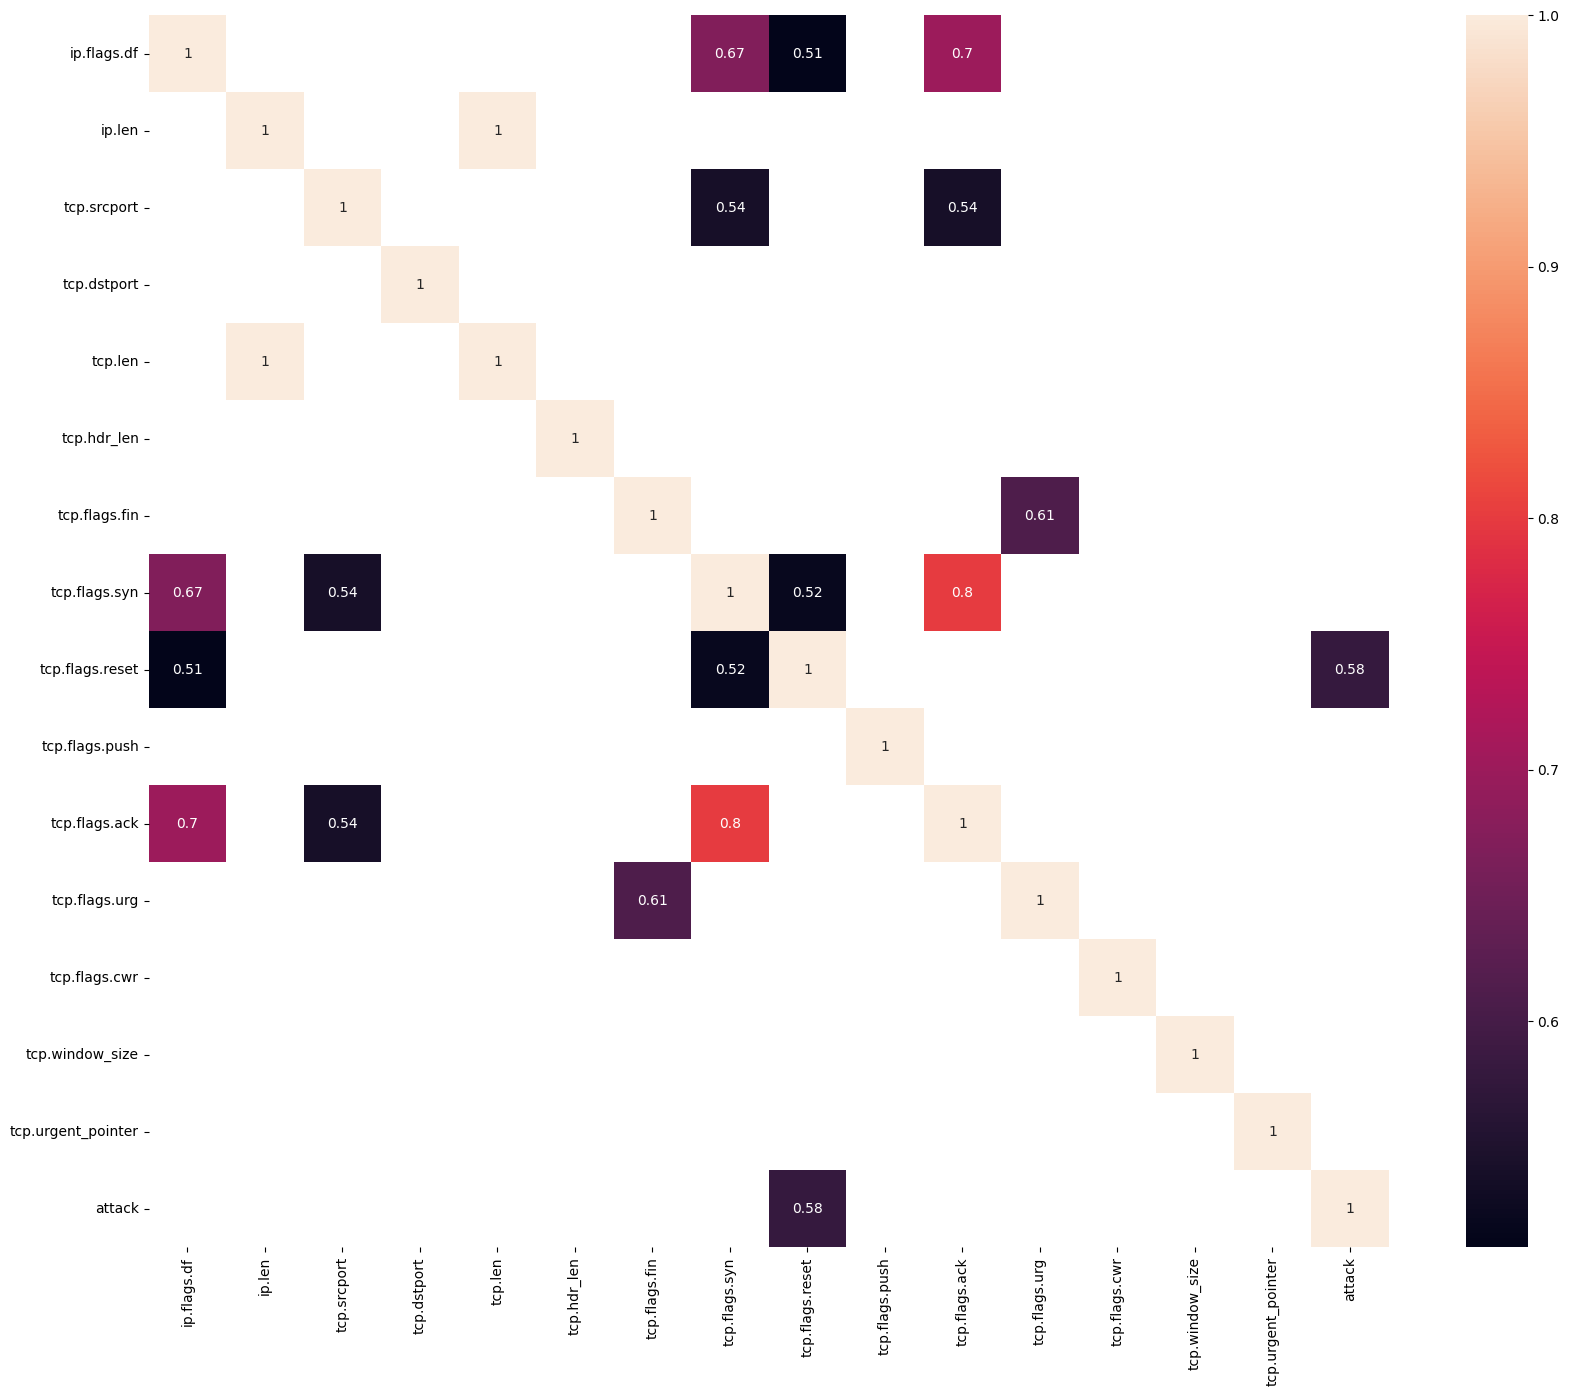

In [ ]:
import seaborn as sns
high_corr = df.corr().abs().round(2)
high_corr_var = high_corr[high_corr>0.5]
plt.figure(figsize = (20,16))
sns.heatmap(high_corr_var, xticklabels=high_corr_var.columns, yticklabels=high_corr_var.columns, annot=True);

In [ ]:
len(df.columns)

18

In [ ]:
df

ip.id  ip.flags.df  ip.len  ip.dsfield  tcp.srcport  tcp.dstport  \
0       0x0000b2c5          0.0    44.0  0x00000000      62218.0       8888.0   
1       0x0000d3a4          0.0    44.0  0x00000000      62218.0        587.0   
2       0x00003084          0.0    44.0  0x00000000      62218.0        995.0   
3       0x000090b5          0.0    44.0  0x00000000      62218.0       1723.0   
4       0x00007d93          0.0    44.0  0x00000000      62218.0       3306.0   
...            ...          ...     ...         ...          ...          ...   
222033  0x00005bf1          1.0   377.0  0x00000000         25.0      48011.0   
222034  0x0000cb2d          0.0    40.0  0x00000000      42982.0      23637.0   
222035  0x0000c250          0.0    44.0  0x00000000      25075.0       3405.0   
222036  0x0000e00f          1.0    52.0  0x00000000      42721.0         22.0   
222037  0x00002a45          1.0    52.0  0x00000000         22.0      44428.0   

        tcp.len  tcp.hdr_len  tcp.flags.fin  tcp.flags.syn  tcp.flags.reset  \
0           0.0         24.0            0.0            1.0              0.0   
1           0.0         24.0            0.0            1.0              0.0   
2           0.0         24.0            0.0            1.0              0.0   
3           0.0         24.0            0.0            1.0              0.0   
4           0.0         24.0            0.0            1.0              0.0   
...         ...          ...            ...            ...              ...   
222033    325.0         32.0            0.0            0.0              0.0   
222034      0.0         20.0            0.0            1.0              0.0   
222035      0.0         24.0            0.0            1.0              0.0   
222036      0.0         32.0            0.0            0.0              0.0   
222037      0.0         32.0            0.0            0.0              0.0   

        tcp.flags.push  tcp.flags.ack  tcp.flags.urg  tcp.flags.cwr  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
222033             1.0            1.0            0.0            0.0   
222034             0.0            0.0            0.0            0.0   
222035             0.0            0.0            0.0            0.0   
222036             0.0            1.0            0.0            0.0   
222037             0.0            1.0            0.0            0.0   

        tcp.window_size  tcp.urgent_pointer  attack  
0                1024.0                 0.0       1  
1                1024.0                 0.0       1  
2                1024.0                 0.0       1  
3                1024.0                 0.0       1  
4                1024.0                 0.0       1  
...                 ...                 ...     ...  
222033          64074.0                 0.0       0  
222034           1024.0                 0.0       0  
222035           1024.0                 0.0       0  
222036            253.0                 0.0       0  
222037            507.0                 0.0       0  

[205641 rows x 18 columns]

In [ ]:
df.dtypes

ip.id                  object
ip.flags.df           float64
ip.len                float64
ip.dsfield             object
tcp.srcport           float64
tcp.dstport           float64
tcp.len               float64
tcp.hdr_len           float64
tcp.flags.fin         float64
tcp.flags.syn         float64
tcp.flags.reset       float64
tcp.flags.push        float64
tcp.flags.ack         float64
tcp.flags.urg         float64
tcp.flags.cwr         float64
tcp.window_size       float64
tcp.urgent_pointer    float64
attack                  int64
dtype: object

In [ ]:
for feature in df.columns:
    print(feature)
    print(df[feature].unique())
    print()

ip.id
['0x0000b2c5' '0x0000d3a4' '0x00003084' ... '0x0000c381' '0x00000d2a'
 '0x0000360a']

ip.flags.df
[0. 1.]

ip.len
[  44.   40.   60. ...  720.  247. 1699.]

ip.dsfield
['0x00000000' '0x00000002' '0x00000003' '0x000000c0' '0x00000010'
 '0x00000040' '0x00000020' '0x00000004' '0x00000038' '0x000000e0'
 '0x00000008' '0x000000b8']

tcp.srcport
[62218.  8888.   587. ... 25951. 18005. 42721.]

tcp.dstport
[ 8888.   587.   995. ... 65286. 11843. 38029.]

tcp.len
[   0.   19.   41. ... 1663.  398. 1659.]

tcp.hdr_len
[24. 20. 40. 32. 44. 28. 60. 52. 56. 48. 36.]

tcp.flags.fin
[0. 1.]

tcp.flags.syn
[1. 0.]

tcp.flags.reset
[0. 1.]

tcp.flags.push
[0. 1.]

tcp.flags.ack
[0. 1.]

tcp.flags.urg
[0. 1.]

tcp.flags.cwr
[0. 1.]

tcp.window_size
[ 1024.     0. 29200. ... 54808. 64484.  3504.]

tcp.urgent_pointer
[0.0000e+00 1.0000e+00 2.6479e+04 2.4714e+04 4.1146e+04 6.4447e+04
 6.2942e+04 3.5130e+04 4.8941e+04]

attack
[1 0]



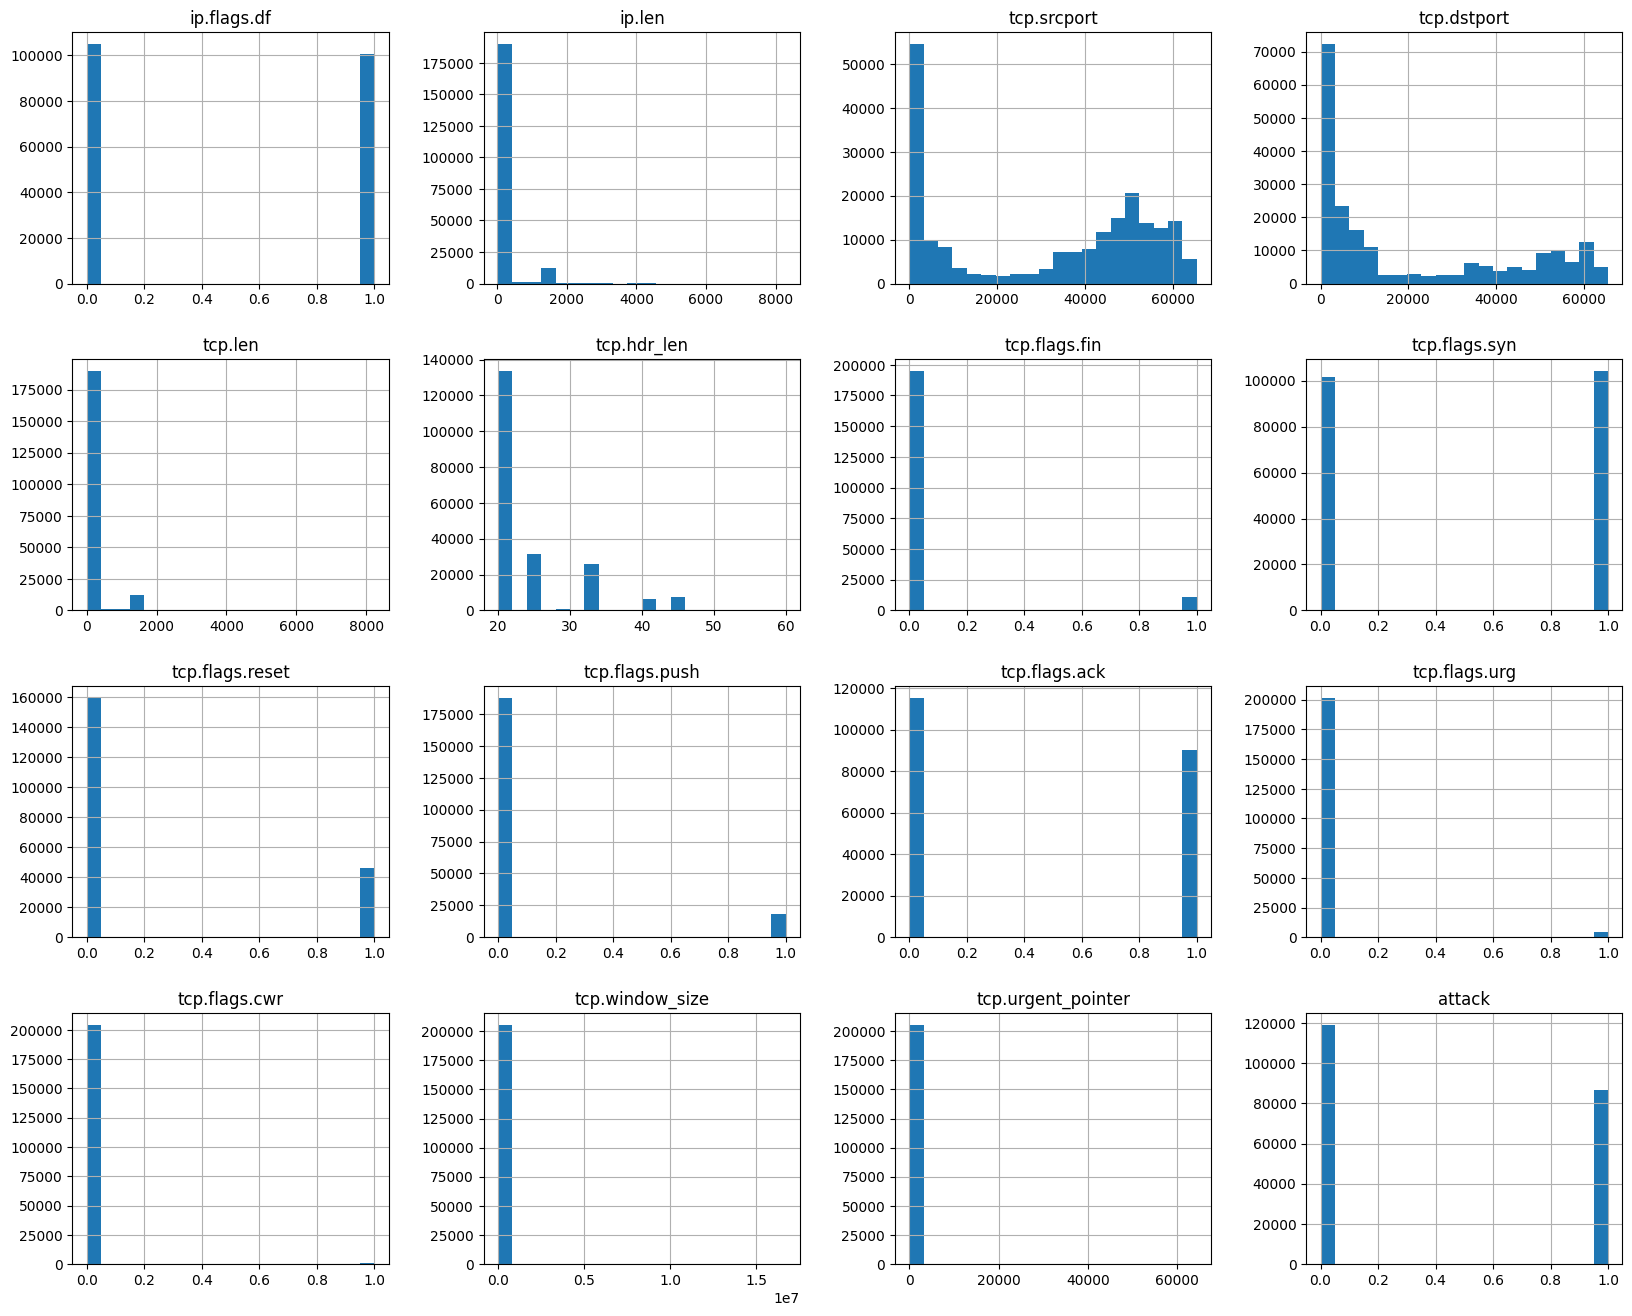

In [ ]:
df.hist(bins=20, figsize=(20,16))
plt.show()

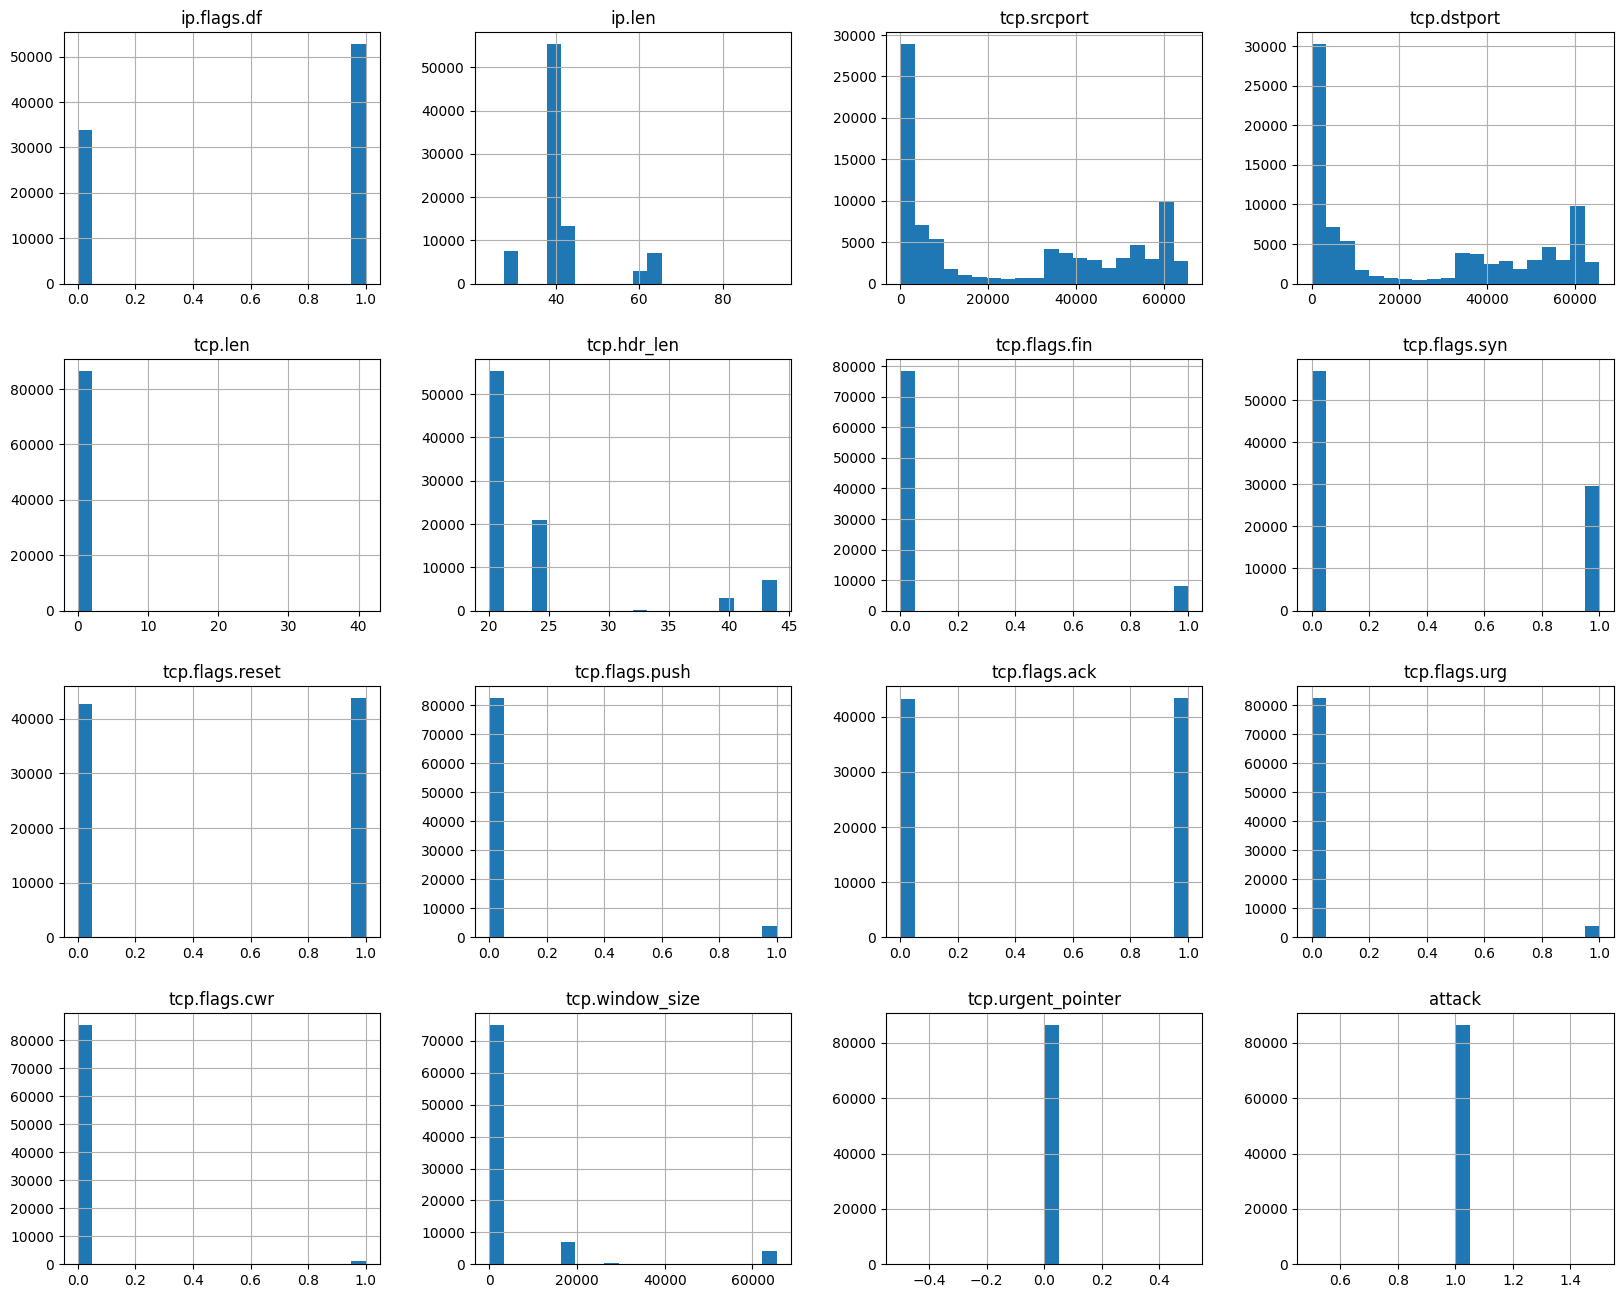

In [ ]:
df.loc[df['attack'] == 1].hist(bins=20, figsize=(20,16))
plt.show()

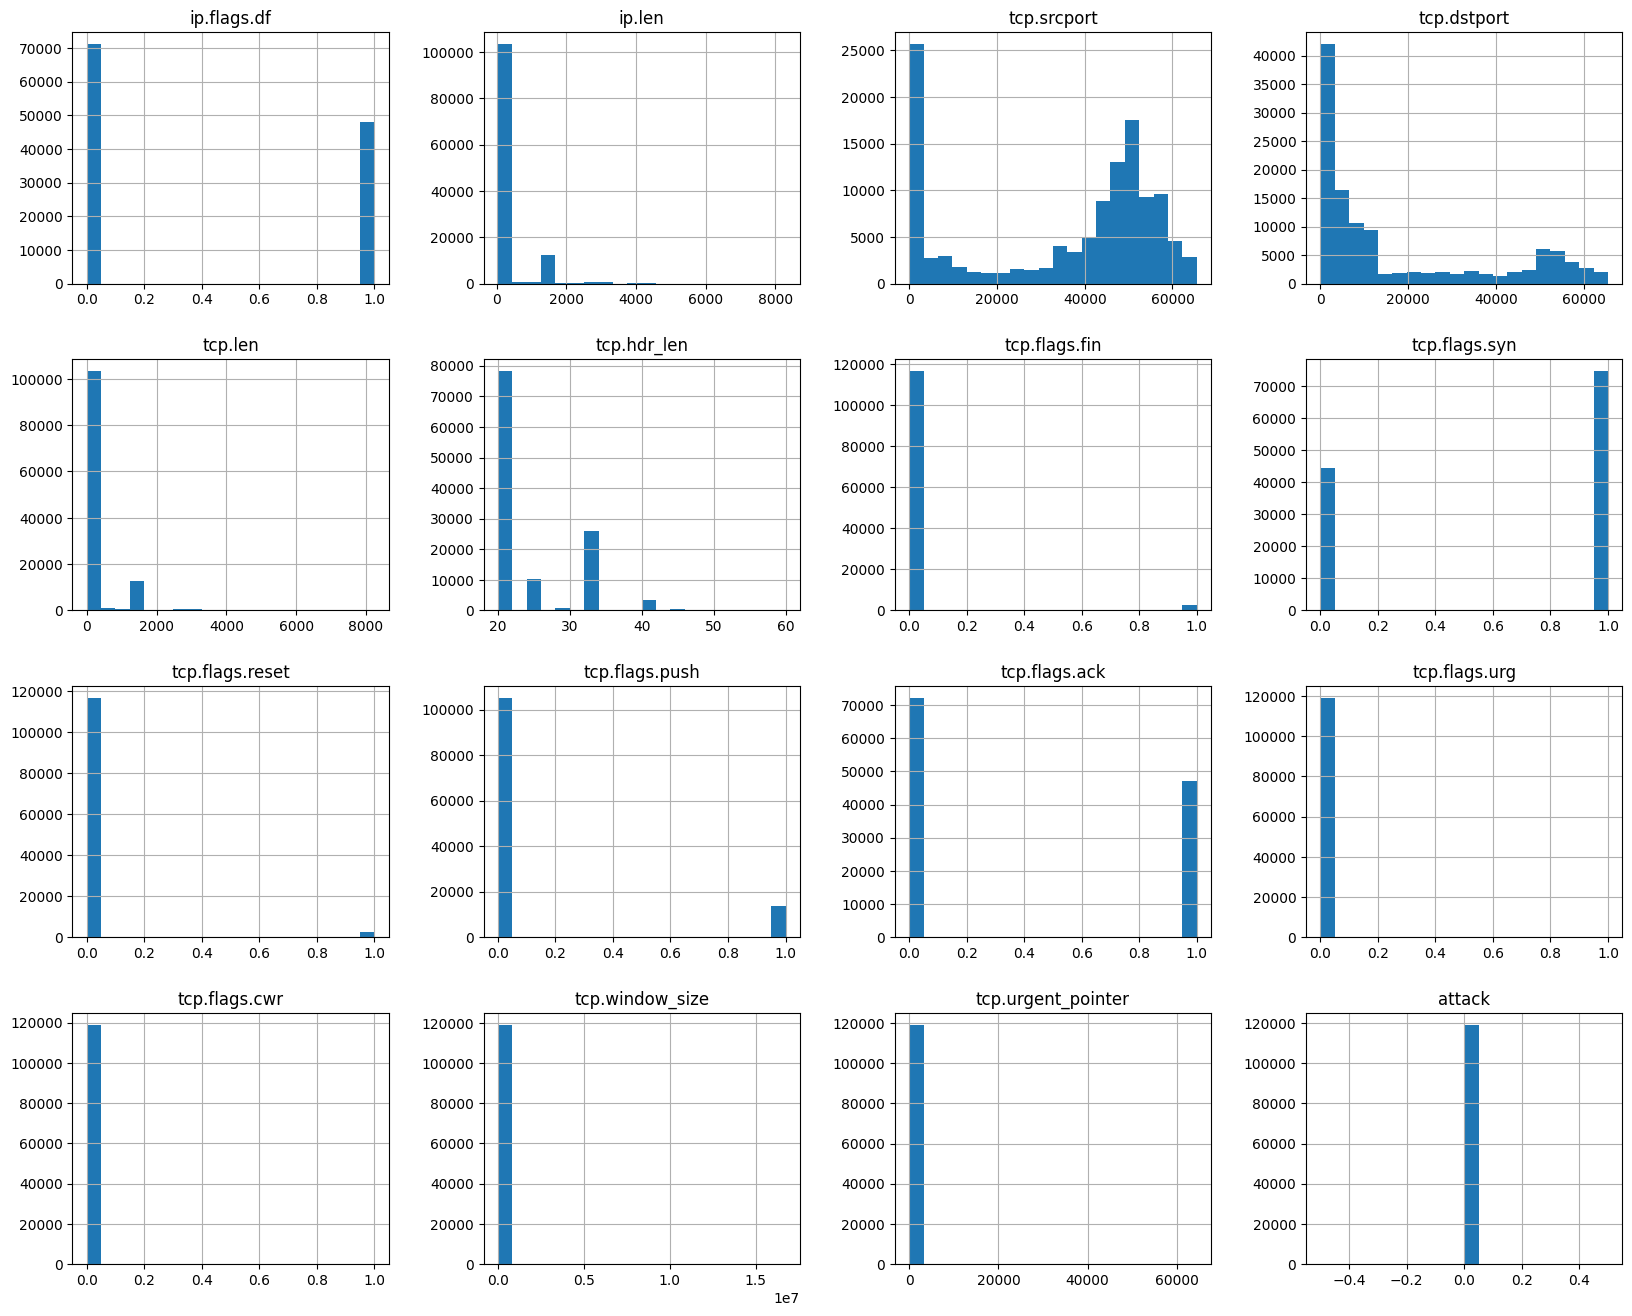

In [ ]:
df.loc[df['attack'] == 0].hist(bins=20, figsize=(20,16))
plt.show()

# Usunięcie wierszy z brakującymi wartościami

In [ ]:
df = df.dropna()

In [ ]:
df['ip.id'] = df['ip.id'].apply(lambda x: int(x, 16))
df['ip.dsfield'] = df['ip.dsfield'].apply(lambda x: int(x, 16))

In [ ]:
df

ip.id  ip.flags.df  ip.len  ip.dsfield  tcp.srcport  tcp.dstport  \
0       45765          0.0    44.0           0      62218.0       8888.0   
1       54180          0.0    44.0           0      62218.0        587.0   
2       12420          0.0    44.0           0      62218.0        995.0   
3       37045          0.0    44.0           0      62218.0       1723.0   
4       32147          0.0    44.0           0      62218.0       3306.0   
...       ...          ...     ...         ...          ...          ...   
222033  23537          1.0   377.0           0         25.0      48011.0   
222034  52013          0.0    40.0           0      42982.0      23637.0   
222035  49744          0.0    44.0           0      25075.0       3405.0   
222036  57359          1.0    52.0           0      42721.0         22.0   
222037  10821          1.0    52.0           0         22.0      44428.0   

        tcp.len  tcp.hdr_len  tcp.flags.fin  tcp.flags.syn  tcp.flags.reset  \
0           0.0         24.0            0.0            1.0              0.0   
1           0.0         24.0            0.0            1.0              0.0   
2           0.0         24.0            0.0            1.0              0.0   
3           0.0         24.0            0.0            1.0              0.0   
4           0.0         24.0            0.0            1.0              0.0   
...         ...          ...            ...            ...              ...   
222033    325.0         32.0            0.0            0.0              0.0   
222034      0.0         20.0            0.0            1.0              0.0   
222035      0.0         24.0            0.0            1.0              0.0   
222036      0.0         32.0            0.0            0.0              0.0   
222037      0.0         32.0            0.0            0.0              0.0   

        tcp.flags.push  tcp.flags.ack  tcp.flags.urg  tcp.flags.cwr  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
222033             1.0            1.0            0.0            0.0   
222034             0.0            0.0            0.0            0.0   
222035             0.0            0.0            0.0            0.0   
222036             0.0            1.0            0.0            0.0   
222037             0.0            1.0            0.0            0.0   

        tcp.window_size  tcp.urgent_pointer  attack  
0                1024.0                 0.0       1  
1                1024.0                 0.0       1  
2                1024.0                 0.0       1  
3                1024.0                 0.0       1  
4                1024.0                 0.0       1  
...                 ...                 ...     ...  
222033          64074.0                 0.0       0  
222034           1024.0                 0.0       0  
222035           1024.0                 0.0       0  
222036            253.0                 0.0       0  
222037            507.0                 0.0       0  

[205639 rows x 18 columns]

# Podział zbioru na cechy opisujące i cechę opisywaną

In [ ]:
X = df.drop(columns=['attack'])
X = X.reset_index(drop=True)
X

ip.id  ip.flags.df  ip.len  ip.dsfield  tcp.srcport  tcp.dstport  \
0       45765          0.0    44.0           0      62218.0       8888.0   
1       54180          0.0    44.0           0      62218.0        587.0   
2       12420          0.0    44.0           0      62218.0        995.0   
3       37045          0.0    44.0           0      62218.0       1723.0   
4       32147          0.0    44.0           0      62218.0       3306.0   
...       ...          ...     ...         ...          ...          ...   
205634  23537          1.0   377.0           0         25.0      48011.0   
205635  52013          0.0    40.0           0      42982.0      23637.0   
205636  49744          0.0    44.0           0      25075.0       3405.0   
205637  57359          1.0    52.0           0      42721.0         22.0   
205638  10821          1.0    52.0           0         22.0      44428.0   

        tcp.len  tcp.hdr_len  tcp.flags.fin  tcp.flags.syn  tcp.flags.reset  \
0           0.0         24.0            0.0            1.0              0.0   
1           0.0         24.0            0.0            1.0              0.0   
2           0.0         24.0            0.0            1.0              0.0   
3           0.0         24.0            0.0            1.0              0.0   
4           0.0         24.0            0.0            1.0              0.0   
...         ...          ...            ...            ...              ...   
205634    325.0         32.0            0.0            0.0              0.0   
205635      0.0         20.0            0.0            1.0              0.0   
205636      0.0         24.0            0.0            1.0              0.0   
205637      0.0         32.0            0.0            0.0              0.0   
205638      0.0         32.0            0.0            0.0              0.0   

        tcp.flags.push  tcp.flags.ack  tcp.flags.urg  tcp.flags.cwr  \
0                  0.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  0.0            0.0            0.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
205634             1.0            1.0            0.0            0.0   
205635             0.0            0.0            0.0            0.0   
205636             0.0            0.0            0.0            0.0   
205637             0.0            1.0            0.0            0.0   
205638             0.0            1.0            0.0            0.0   

        tcp.window_size  tcp.urgent_pointer  
0                1024.0                 0.0  
1                1024.0                 0.0  
2                1024.0                 0.0  
3                1024.0                 0.0  
4                1024.0                 0.0  
...                 ...                 ...  
205634          64074.0                 0.0  
205635           1024.0                 0.0  
205636           1024.0                 0.0  
205637            253.0                 0.0  
205638            507.0                 0.0  

[205639 rows x 17 columns]

In [ ]:
y = df['attack']
y = y.reset_index(drop=True)
y

0         1
1         1
2         1
3         1
4         1
         ..
205634    0
205635    0
205636    0
205637    0
205638    0
Name: attack, Length: 205639, dtype: int64

# Podział zbioru na dane treningowe i testowe

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(137778, 17)

# Standaryzacja danych

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.43106439, -0.97976599, -0.2764614 , ..., -0.07608518,
        -0.11785564, -0.00532233],
       [ 0.95351622, -0.97976599, -0.2858708 , ..., -0.07608518,
        -0.11785564, -0.00532233],
       [-1.07571277,  1.02065188, -0.25764262, ..., -0.07608518,
        -0.08197165, -0.00532233],
       ...,
       [-0.52108309, -0.97976599, -0.2858708 , ..., -0.07608518,
         0.17814529, -0.00532233],
       [-1.4139602 , -0.97976599, -0.2858708 , ..., -0.07608518,
        -0.11785564, -0.00532233],
       [ 1.26646027, -0.97976599, -0.2858708 , ..., -0.07608518,
        -0.11785564, -0.00532233]])

In [ ]:
y_train

66549     1
159723    0
164457    0
129597    0
42962     1
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: attack, Length: 137778, dtype: int64

# Trenowanie modeli

## Naiwny model Bayesa

In [ ]:
param_grid = [
    {'var_smoothing': [1e-8, 1e-9]}
]

gaussian_nb = GaussianNB()
clf = GridSearchCV(gaussian_nb, param_grid, scoring='f1', verbose=3)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.650 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.648 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.650 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.649 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.651 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.650 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.648 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.650 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.649 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.651 total time=   0.0s


GridSearchCV(estimator=GaussianNB(),
             param_grid=[{'var_smoothing': [1e-08, 1e-09]}], scoring='f1',
             verbose=3)

In [ ]:
clf.best_params_

{'var_smoothing': 1e-08}

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_scaled, y_train)
t0 = time()
preds = gaussian_nb.predict(X_test_scaled)
t_diff = time() - t0
print('Czas przewidywania na próbkę:', t_diff * 1000 / X_test_scaled.shape[0], 'ms')
f1_score(preds, y_test)

Czas przewidywania na próbkę: 8.512464822286377e-05 ms


0.6464851315939386

## Regresja logistyczna

In [ ]:
param_grid = [
    {'penalty': [None], 'max_iter': [200, 250]},
    {'penalty': ['l2'], 'C': [0.9, 1], 'max_iter': [200, 250]},
    {'penalty': ['l1'], 'C': [0.9, 1], 'max_iter': [200, 250], 'solver': ['liblinear']},
]

logistic_regression = LogisticRegression()
clf = GridSearchCV(logistic_regression, param_grid, scoring='f1', verbose=3)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........max_iter=200, penalty=None;, score=0.817 total time=   0.9s
[CV 2/5] END ........max_iter=200, penalty=None;, score=0.814 total time=   0.8s
[CV 3/5] END ........max_iter=200, penalty=None;, score=0.823 total time=   0.7s
[CV 4/5] END ........max_iter=200, penalty=None;, score=0.814 total time=   1.0s
[CV 5/5] END ........max_iter=200, penalty=None;, score=0.822 total time=   0.8s
[CV 1/5] END ........max_iter=250, penalty=None;, score=0.817 total time=   0.9s
[CV 2/5] END ........max_iter=250, penalty=None;, score=0.814 total time=   0.8s
[CV 3/5] END ........max_iter=250, penalty=None;, score=0.823 total time=   0.7s
[CV 4/5] END ........max_iter=250, penalty=None;, score=0.814 total time=   1.0s
[CV 5/5] END ........max_iter=250, penalty=None;, score=0.822 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=0.9, max_iter=200, penalty=l2;, score=0.814 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=0.9, max_iter=200, penalty=l2;, score=0.811 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=0.9, max_iter=200, penalty=l2;, score=0.820 total time=   1.4s
[CV 4/5] END ...C=0.9, max_iter=200, penalty=l2;, score=0.811 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=0.9, max_iter=200, penalty=l2;, score=0.819 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=0.9, max_iter=250, penalty=l2;, score=0.814 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=0.9, max_iter=250, penalty=l2;, score=0.811 total time=   1.6s
[CV 3/5] END ...C=0.9, max_iter=250, penalty=l2;, score=0.820 total time=   1.5s
[CV 4/5] END ...C=0.9, max_iter=250, penalty=l2;, score=0.811 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=0.9, max_iter=250, penalty=l2;, score=0.819 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .....C=1, max_iter=200, penalty=l2;, score=0.814 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .....C=1, max_iter=200, penalty=l2;, score=0.811 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .....C=1, max_iter=200, penalty=l2;, score=0.820 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .....C=1, max_iter=200, penalty=l2;, score=0.811 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .....C=1, max_iter=200, penalty=l2;, score=0.819 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .....C=1, max_iter=250, penalty=l2;, score=0.814 total time=   2.0s
[CV 2/5] END .....C=1, max_iter=250, penalty=l2;, score=0.811 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .....C=1, max_iter=250, penalty=l2;, score=0.820 total time=   1.6s
[CV 4/5] END .....C=1, max_iter=250, penalty=l2;, score=0.811 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .....C=1, max_iter=250, penalty=l2;, score=0.819 total time=   1.6s
[CV 1/5] END C=0.9, max_iter=200, penalty=l1, solver=liblinear;, score=0.817 total time= 1.9min
[CV 2/5] END C=0.9, max_iter=200, penalty=l1, solver=liblinear;, score=0.814 total time= 2.1min
[CV 3/5] END C=0.9, max_iter=200, penalty=l1, solver=liblinear;, score=0.823 total time= 1.6min
[CV 4/5] END C=0.9, max_iter=200, penalty=l1, solver=liblinear;, score=0.814 total time= 1.5min
[CV 5/5] END C=0.9, max_iter=200, penalty=l1, solver=liblinear;, score=0.822 total time= 2.1min
[CV 1/5] END C=0.9, max_iter=250, penalty=l1, solver=liblinear;, score=0.817 total time= 1.2min
[CV 2/5] END C=0.9, max_iter=250, penalty=l1, solver=liblinear;, score=0.814 total time= 1.5min
[CV 3/5] END C=0.9, max_iter=250, penalty=l1, solver=liblinear;, score=0.823 total time= 1.4min
[CV 4/5] END C=0.9, max_iter=250, penalty=l1, solver=liblinear;, score=0.814 total time= 1.2min
[CV 5/5] END C=0.9, max_iter=250, penalty=l1, solver=li

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'max_iter': [200, 250], 'penalty': [None]},
                         {'C': [0.9, 1], 'max_iter': [200, 250],
                          'penalty': ['l2']},
                         {'C': [0.9, 1], 'max_iter': [200, 250],
                          'penalty': ['l1'], 'solver': ['liblinear']}],
             scoring='f1', verbose=3)

In [ ]:
clf.best_params_

{'max_iter': 200, 'penalty': None}

In [ ]:
logistic_regression = LogisticRegression(**clf.best_params_)
logistic_regression.fit(X_train_scaled, y_train)
t0 = time()
preds = logistic_regression.predict(X_test_scaled)
t_diff = time() - t0
print('Czas przewidywania na próbkę:', t_diff * 1000 / X_test_scaled.shape[0], 'ms')
f1_score(preds, y_test)

Czas przewidywania na próbkę: 2.5812488773510258e-05 ms


0.8186106598289261

## Drzewo decyzyjne

In [ ]:
param_grid = [
    {'criterion': ['gini', 'entropy'],
     'max_depth': [None, 200, 100],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 10],
     'max_features': [None, 10, 5]},
]

decision_tree_classifier = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree_classifier, param_grid, scoring='f1', verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.996 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.997 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.996 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.996 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.996 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.996 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.9

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 200, 100],
                          'max_features': [None, 10, 5],
                          'min_samples_leaf': [1, 10],
                          'min_samples_split': [2, 5, 10]}],
             scoring='f1', verbose=3)

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 200,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(**clf.best_params_)
decision_tree_classifier.fit(X_train, y_train)
t0 = time()
preds = decision_tree_classifier.predict(X_test)
t_diff = time() - t0
print('Czas przewidywania na próbkę:', t_diff * 1000 / X_test.shape[0], 'ms')
f1_score(preds, y_test)

Czas przewidywania na próbkę: 0.00020606074303187018 ms


0.9961957096058331

## SVM

In [ ]:
param_grid = [
    {'C': [0.9, 1.0, 1.1],
     'kernel': ['linear', 'rbf'],
     'max_iter': [500]},
    {'C': [0.9, 1.0, 1.1],
     'kernel': ['poly'],
     'degree': [3, 4, 5],
     'max_iter': [500]}
]

svc = SVC()
clf = GridSearchCV(svc, param_grid, scoring='f1', verbose=3)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.9, kernel=linear, max_iter=500;, score=0.617 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.9, kernel=linear, max_iter=500;, score=0.400 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.9, kernel=linear, max_iter=500;, score=0.610 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.9, kernel=linear, max_iter=500;, score=0.613 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.9, kernel=linear, max_iter=500;, score=0.618 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ...C=0.9, kernel=rbf, max_iter=500;, score=0.295 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ...C=0.9, kernel=rbf, max_iter=500;, score=0.162 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ...C=0.9, kernel=rbf, max_iter=500;, score=0.438 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ...C=0.9, kernel=rbf, max_iter=500;, score=0.454 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ...C=0.9, kernel=rbf, max_iter=500;, score=0.301 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, kernel=linear, max_iter=500;, score=0.623 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, kernel=linear, max_iter=500;, score=0.611 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, kernel=linear, max_iter=500;, score=0.627 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, kernel=linear, max_iter=500;, score=0.612 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, kernel=linear, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ...C=1.0, kernel=rbf, max_iter=500;, score=0.452 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ...C=1.0, kernel=rbf, max_iter=500;, score=0.674 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ...C=1.0, kernel=rbf, max_iter=500;, score=0.414 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ...C=1.0, kernel=rbf, max_iter=500;, score=0.440 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ...C=1.0, kernel=rbf, max_iter=500;, score=0.296 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.1, kernel=linear, max_iter=500;, score=0.379 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.1, kernel=linear, max_iter=500;, score=0.617 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.1, kernel=linear, max_iter=500;, score=0.397 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.1, kernel=linear, max_iter=500;, score=0.611 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.1, kernel=linear, max_iter=500;, score=0.614 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ...C=1.1, kernel=rbf, max_iter=500;, score=0.437 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ...C=1.1, kernel=rbf, max_iter=500;, score=0.431 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ...C=1.1, kernel=rbf, max_iter=500;, score=0.637 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ...C=1.1, kernel=rbf, max_iter=500;, score=0.389 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ...C=1.1, kernel=rbf, max_iter=500;, score=0.349 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.9, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.9, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.9, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.9, degree=3, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.9, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.9, degree=4, kernel=poly, max_iter=500;, score=0.593 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.9, degree=4, kernel=poly, max_iter=500;, score=0.595 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.9, degree=4, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.9, degree=4, kernel=poly, max_iter=500;, score=0.593 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.9, degree=4, kernel=poly, max_iter=500;, score=0.591 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.9, degree=5, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.9, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.9, degree=5, kernel=poly, max_iter=500;, score=0.594 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.9, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.9, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=3, kernel=poly, max_iter=500;, score=0.595 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=4, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=4, kernel=poly, max_iter=500;, score=0.596 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=4, kernel=poly, max_iter=500;, score=0.593 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=4, kernel=poly, max_iter=500;, score=0.596 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=4, kernel=poly, max_iter=500;, score=0.593 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.0, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.0, degree=5, kernel=poly, max_iter=500;, score=0.601 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.0, degree=5, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.0, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.0, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.1, degree=3, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.1, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.1, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.1, degree=3, kernel=poly, max_iter=500;, score=0.594 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.1, degree=3, kernel=poly, max_iter=500;, score=0.596 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.1, degree=4, kernel=poly, max_iter=500;, score=0.596 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.1, degree=4, kernel=poly, max_iter=500;, score=0.596 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.1, degree=4, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.1, degree=4, kernel=poly, max_iter=500;, score=0.593 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.1, degree=4, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1.1, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1.1, degree=5, kernel=poly, max_iter=500;, score=0.595 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1.1, degree=5, kernel=poly, max_iter=500;, score=0.594 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1.1, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1.1, degree=5, kernel=poly, max_iter=500;, score=0.593 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.9, 1.0, 1.1], 'kernel': ['linear', 'rbf'],
                          'max_iter': [500]},
                         {'C': [0.9, 1.0, 1.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'max_iter': [500]}],
             scoring='f1', verbose=3)

In [ ]:
clf.best_params_

{'C': 1.0, 'kernel': 'linear', 'max_iter': 500}

In [ ]:
svc = SVC(**clf.best_params_)
svc.fit(X_train_scaled, y_train)
t0 = time()
preds = svc.predict(X_test_scaled)
t_diff = time() - t0
print('Czas przewidywania na próbkę:', t_diff * 1000 / X_test_scaled.shape[0], 'ms')
f1_score(preds, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Czas przewidywania na próbkę: 0.013834882661920051 ms


0.6020502319467091

## K najbliższych sąsiadów

In [ ]:
param_grid = [
    {'n_neighbors': [1, 2, 5],
     'metric': ['minkowski'],
     'p': [2]}
]

k_neighbors_classifier = KNeighborsClassifier()
clf = GridSearchCV(k_neighbors_classifier, param_grid, scoring='f1', verbose=3)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END metric=minkowski, n_neighbors=1, p=2;, score=0.980 total time=  10.2s
[CV 2/5] END metric=minkowski, n_neighbors=1, p=2;, score=0.979 total time=   9.3s
[CV 3/5] END metric=minkowski, n_neighbors=1, p=2;, score=0.980 total time=   9.8s
[CV 4/5] END metric=minkowski, n_neighbors=1, p=2;, score=0.979 total time=  10.1s
[CV 5/5] END metric=minkowski, n_neighbors=1, p=2;, score=0.980 total time=  10.0s
[CV 1/5] END metric=minkowski, n_neighbors=2, p=2;, score=0.976 total time=  10.1s
[CV 2/5] END metric=minkowski, n_neighbors=2, p=2;, score=0.974 total time=  10.0s
[CV 3/5] END metric=minkowski, n_neighbors=2, p=2;, score=0.974 total time=   9.1s
[CV 4/5] END metric=minkowski, n_neighbors=2, p=2;, score=0.974 total time=  10.1s
[CV 5/5] END metric=minkowski, n_neighbors=2, p=2;, score=0.975 total time=  10.1s
[CV 1/5] END metric=minkowski, n_neighbors=5, p=2;, score=0.977 total time=  10.2s
[CV 2/5] END metric=minkows

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski'], 'n_neighbors': [1, 2, 5],
                          'p': [2]}],
             scoring='f1', verbose=3)

In [ ]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'p': 2}

In [ ]:
k_neighbors_classifier = KNeighborsClassifier(**clf.best_params_)
k_neighbors_classifier.fit(X_train_scaled, y_train)
t0 = time()
preds = k_neighbors_classifier.predict(X_test_scaled)
t_diff = time() - t0
print('Czas przewidywania na próbkę:', t_diff * 1000 / X_test_scaled.shape[0], 'ms')
f1_score(preds, y_test)

Czas przewidywania na próbkę: 0.437137490742733 ms


0.981305955113268

## Las losowy

In [ ]:
param_grid = [
    {'n_estimators': [50, 100],
     'criterion': ['gini', 'entropy'],
     'max_depth': [None],
     'min_samples_split': [2],
     'min_samples_leaf': [1, 10],
     'max_features': [None]}
]

random_forest_classifier = RandomForestClassifier()
clf = GridSearchCV(random_forest_classifier, param_grid, scoring='f1', verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.997 total time=  18.9s
[CV 2/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.998 total time=  21.3s
[CV 3/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.997 total time=  17.4s
[CV 4/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.997 total time=  17.6s
[CV 5/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.997 total time=  19.2s
[CV 1/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.997 total time=  42.5s
[CV 2/5] END cr

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [None],
                          'max_features': [None], 'min_samples_leaf': [1, 10],
                          'min_samples_split': [2],
                          'n_estimators': [50, 100]}],
             scoring='f1', verbose=3)

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
random_forest_classifier = RandomForestClassifier(**clf.best_params_)
random_forest_classifier.fit(X_train, y_train)
t0 = time()
preds = random_forest_classifier.predict(X_test)
t_diff = time() - t0
print('Czas przewidywania na próbkę:', t_diff * 1000 / X_test.shape[0], 'ms')
f1_score(preds, y_test)

Czas przewidywania na próbkę: 0.004186910753869453 ms


0.997307143988595

Konwersja modelu do języka C

In [ ]:
cmodel = emlearn.convert(random_forest_classifier)
cmodel.save(file='./scan.h')

'\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nEmlTreesNode scan_nodes[22062] = {\n  { 10, 0.5, 1, 235 },\n  { 2, 34.0, 2, 3 },\n  { -1, 1, -1, -1 },\n  { 7, 42.0, 4, 232 },\n  { 4, 59778.5, 5, 218 },\n  { 8, 0.5, 6, 210 },\n  { 7, 38.0, 7, 139 },\n  { 14, 0.5, 8, 138 },\n  { 2, 45.0, 9, 129 },\n  { 7, 22.0, 10, 51 },\n  { 15, 512.5, 11, 14 },\n  { 15, 511.0, 12, 13 },\n  { -1, 0, -1, -1 },\n  { 1, 0.5, 2, 12 },\n  { 9, 0.5, 15, 20 },\n  { 1, 0.5, 16, 12 },\n  { 15, 1231.0, 17, 12 },\n  { 15, 812.0, 12, 18 },\n  { 4, 51162.5, 2, 19 },\n  { 5, 4481.5, 2, 12 },\n  { 5, 3.5, 2, 21 },\n  { 5, 500.5, 22, 12 },\n  { 5, 103.0, 23, 41 },\n  { 5, 22.5, 24, 32 },\n  { 15, 59549.5, 25, 30 },\n  { 5, 20.5, 26, 28 },\n  { 4, 41418.5, 27, 12 },\n  { 4, 38405.0, 12, 2 },\n  { 0, 47670.5, 12, 29 },\n  { 0, 49237.5, 2, 12 },\n  { 4, 35319.5, 31, 12 },\n  { 4, 33123.0, 12, 2 },\n  { 15, 1068.5, 33, 35 },\n  { 4, 40089.0, 34, 12 },\n  { 4, 39924.0, 12, 2 },\

### Skrypt do przekonwertowania skanu pod konkretne zadanie analizy ruchu sieciowego

In [ ]:
# ['ip.id', 'ip.flags.df', 'ip.len', 'ip.dsfield', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.hdr_len', 'tcp.flags.fin', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push', 'tcp.flags.ack', 'tcp.flags.urg', 'tcp.flags.cwr', 'tcp.window_size', 'tcp.urgent_pointer']

import math
import re

FLAGS_INDEXES = (1,8,9,10,11,12,13,14)
LITTLE_ENDIAN_INDEX = 6

def normal_round(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

def transform(match: re.Match):
    relation = '<'
    index = int(match.group(1))
    if index in FLAGS_INDEXES:
        return f'{features[index]} == 0'
    else:
        number = float(match.group(2))
    if index == LITTLE_ENDIAN_INDEX:
        return f'{features[index]} < {normal_round(number)}'
    return f'{features[index]} {relation} htons({normal_round(number)})'

features = ['iph->id', '(iph->frag_off & IP_DF)', 'iph->tot_len', 'iph->tos', 'tcph->source', 'tcph->dest', '(unsigned int)tcp_segment_length', '(tcph->doff*4)', 'tcph->fin', 'tcph->syn', 'tcph->rst', 'tcph->psh', 'tcph->ack', 'tcph->urg', 'tcph->cwr', 'tcph->window', 'tcph->urg_ptr']

with open('scan.h', 'r', encoding='utf-8') as f:
    txt = f.read()
    pattern = r"features\[(\d{1,2})\] < (-?\d+\.\d+)"
    txt = txt.replace("const float *features, int32_t features_length", "struct iphdr *iph, struct tcphdr *tcph, u_int16_t tcp_segment_length")\
        .replace("features, features_length", "iph, tcph, tcp_segment_length")
    new_txt = re.sub(pattern, transform, txt)

    output = open('model.h', 'w', encoding='utf-8')
    output.write(new_txt)
    output.close()

Poniższy kod należy wykonać na urządzeniu docelowym

In [ ]:
!wget https://github.com/c2dc/AB-TRAP/raw/main/4_RealizAtion/Local_Area_Network/Makefile
!wget https://github.com/c2dc/AB-TRAP/raw/main/4_RealizAtion/Local_Area_Network/dt.c

In [ ]:
!make

In [ ]:
!sudo insmod dt.ko

In [ ]:
!lsmod | grep dt # sprawdzenie, czy LKM działa

# Testy wydajnościowe

In [ ]:
with_lkm = pd.read_csv('with_lkm.csv', sep=';')
without_lkm = pd.read_csv('without_lkm.csv', sep=';')

In [ ]:
with_lkm.describe()

interval     CPU     kbmemfree       kbavail      kbmemused  \
count    1200.0  1200.0  1.200000e+03  1.200000e+03    1200.000000   
mean        1.0    -1.0  3.426740e+06  3.580062e+06  182336.980000   
std         0.0     0.0  1.406111e+03  3.145425e+03    3196.874291   
min         1.0    -1.0  3.422744e+06  3.572228e+06  175680.000000   
25%         1.0    -1.0  3.425752e+06  3.577579e+06  179738.000000   
50%         1.0    -1.0  3.426724e+06  3.579994e+06  182448.000000   
75%         1.0    -1.0  3.427716e+06  3.582593e+06  184889.000000   
max         1.0    -1.0  3.430924e+06  3.586684e+06  190356.000000   

          kbbuffers       kbcached       kbcommit       kbactive  \
count   1200.000000    1200.000000    1200.000000    1200.000000   
mean   27878.446667  312661.946667  498681.920000  141208.606667   
std      512.403863    3143.196598      84.611817     511.436517   
min    26980.000000  307096.000000  498468.000000  140324.000000   
25%    27428.000000  309942.000000  498596.000000  140752.000000   
50%    27884.000000  312662.000000  498728.000000  141220.000000   
75%    28324.000000  315382.000000  498728.000000  141640.000000   
max    28756.000000  318080.000000  498860.000000  142092.000000   

             kbinact  ...  tcpsck  udpsck  rawsck  ip-frag       tcp-tw  \
count    1200.000000  ...  1200.0  1200.0  1200.0   1200.0  1200.000000   
mean   264052.213333  ...     2.0     2.0     0.0      0.0     0.001667   
std      3224.026487  ...     0.0     0.0     0.0      0.0     0.040808   
min    258232.000000  ...     2.0     2.0     0.0      0.0     0.000000   
25%    261260.000000  ...     2.0     2.0     0.0      0.0     0.000000   
50%    264040.000000  ...     2.0     2.0     0.0      0.0     0.000000   
75%    266880.000000  ...     2.0     2.0     0.0      0.0     0.000000   
max    269588.000000  ...     2.0     2.0     0.0      0.0     1.000000   

           tcp6sck  udp6sck  raw6sck  ip6-frag   CPU.1  
count  1200.000000   1200.0   1200.0    1200.0  1200.0  
mean      3.995000      0.0      1.0       0.0    -1.0  
std       0.091188      0.0      0.0       0.0     0.0  
min       2.000000      0.0      1.0       0.0    -1.0  
25%       4.000000      0.0      1.0       0.0    -1.0  
50%       4.000000      0.0      1.0       0.0    -1.0  
75%       4.000000      0.0      1.0       0.0    -1.0  
max       4.000000      0.0      1.0       0.0    -1.0  

[8 rows x 27 columns]

In [ ]:
with_lkm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 190 entries, # hostname to flw_lim/s[...]
dtypes: int64(27), object(163)
memory usage: 1.7+ MB


In [ ]:
features = ['%sys', '%memused', 'rxdrop/s']

In [ ]:
without_lkm[features].replace(',','.',regex=True).astype(float).describe()

%sys     %memused  rxdrop/s
count  1200.000000  1200.000000    1200.0
mean      5.793042     4.488708       0.0
std       0.874819     0.075339       0.0
min       1.030000     4.300000       0.0
25%       5.220000     4.430000       0.0
50%       5.780000     4.470000       0.0
75%       6.300000     4.550000       0.0
max      14.330000     4.670000       0.0

In [ ]:
with_lkm[features].replace(',','.',regex=True).astype(float).describe()

%sys     %memused  rxdrop/s
count  1200.000000  1200.000000    1200.0
mean      5.728908     4.538367       0.0
std       0.836309     0.079680       0.0
min       0.250000     4.370000       0.0
25%       5.217500     4.470000       0.0
50%       5.700000     4.540000       0.0
75%       6.250000     4.600000       0.0
max       9.380000     4.740000       0.0